Graphs & Nodes:
Show synergy between classes where the node-size is relative to the amount of occurrences of the class, and the edges'
thickness relative to the amount that have both instances.

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 55
Average degree:   7.3333


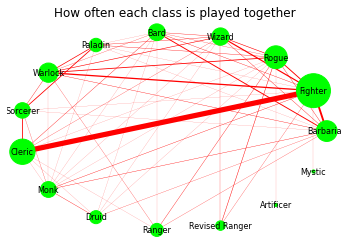

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 136
Average degree:   6.6341


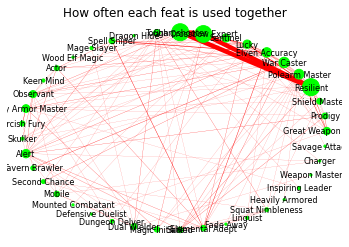

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as pl


class CharacterSynergy:
    """
    This class is designed to create a weighted graph based on class occurrences (nodes) and dual class occurrences (edges)
    """
    
    def __init__(self, dataset = None):
            # get data from dataset
        if dataset is None:
            self.character_data = pd.read_csv('https://raw.githubusercontent.com/oganm/dndstats/master/docs/charTable.tsv', sep='\t')
        else:
            self.character_data = dataset
        
        
    def getCharacterData(self):
        """
        This method finds all characters that have 2 or more classes
        """
        
           # getting all classes that are combined with other classes
        self.multiple_classes = [c for c in self.character_data['justClass'] if "|" in c]
           
           # deleting characters with no feats and getting all feats that are connected with other feats
        no_empty_feats = [c for c in self.character_data['feats'] if type(c) is not float]
        self.multiple_feats = [c for c in no_empty_feats if "|" in c]

    def getClassOccurrenceData(self, show_data = True):
        """
        This method splits all multi-classes and then adds all individual classes, and how many times they occur,
        to a dictionary with "class name" as value and "occurrences" as key. It then displays the dictionary
        """
        
        self.getCharacterData()
           # separating all the classes by splitting strings at "|" and adding to new list
        separated_classes = []
        for i in self.multiple_classes:
            row = i.split("|")
            for r in row:
                separated_classes.append(r)

           # finding every class occurrence and adding to dictionary with "class" as key and "amount" as value
        self.class_occurrences = {}
        for occ in separated_classes:
            if occ in self.class_occurrences:
                self.class_occurrences[occ] +=1
            else:
                self.class_occurrences[occ] =1
                
           # display all class occurrences (nodes)
        if show_data is True:
            display(self.class_occurrences)    

        
    def getDoubleClassOccurrenceData(self, show_data = True):
        """
        This method splits all multiclasses and then adds duals together to form a connection (edges).
        Then it adds all these dual-classes as value in a dictionary and the occurrences as key.
        """
        
        self.getCharacterData()
           # finding all connected classes by separating each connected string and putting them together as dual then adding to new list
        separated_edges = []
        row = []
        for q in self.multiple_classes:
            row = q.split("|")
            for idx_one in range(len(row)):
                for idx_two in range(idx_one+1,len(row)):
                    separated_edges.append((row[idx_one], row[idx_two]))

           # iterating over connected classes (edges) in the new list and adding them to new dictionary
           # with "class connection" as key and "amount" as value
        self.class_edge_occurrences = {}
        for edge in separated_edges:
            if edge in self.class_edge_occurrences:
                self.class_edge_occurrences[edge] +=1
            else:
                self.class_edge_occurrences[edge] =1

           # display all multiclass occurrences (edges)
        if show_data is True:
            display(self.class_edge_occurrences)

            
    def getFeatOccurrenceData(self, show_data = True):
        """
        This method splits all multi-feats and then adds all individual feats, and how many times they occur,
        to a dictionary with "feat name" as value and "occurrences" as key. It then displays the dictionary
        """
        
        self.getCharacterData()
           # separating all the feats by splitting strings at "|" and adding to new list
        separated_feats = []
        for i in self.multiple_feats:
            row = i.split("|")
            for r in row:
                separated_feats.append(r)

           # finding every feat occurrence and adding to dictionary with "feat" as key and "amount" as value
        self.feat_occurrences = {}
        for occ in separated_feats:
            if occ in self.feat_occurrences:
                self.feat_occurrences[occ] +=1
            else:
                self.feat_occurrences[occ] =1
                
           # display all feat occurrences (nodes)
        if show_data is True:
            display(self.feat_occurrences)    

        
    def getDoubleFeatOccurrenceData(self, show_data = True):
        """
        This method splits all multifeats and then adds duals together to form a connection (edges).
        Then it adds all these dual-feats as value in a dictionary and the occurrences as key.
        """
        
        self.getCharacterData()
           # finding all connected feats by separating each connected string and putting them together as dual then adding to new list
        separated_feat_edges = []
        row = []
        for q in self.multiple_feats:
            row = q.split("|")
            for idx_one in range(len(row)):
                for idx_two in range(idx_one+1,len(row)):
                    separated_feat_edges.append((row[idx_one], row[idx_two]))

           # iterating over connected feats (edges) in the new list and adding them to new dictionary
           # with "feat connection" as key and "amount" as value
        self.feat_edge_occurrences = {}
        for edge in separated_feat_edges:
            if edge in self.feat_edge_occurrences:
                self.feat_edge_occurrences[edge] +=1
            else:
                self.feat_edge_occurrences[edge] =1

           # display all multifeat occurrences (edges)
        if show_data is True:
            display(self.feat_edge_occurrences)


    def getGraphClassData(self):
        """
        Creates a NetworkX graph and then continues to add all nodes (individual classes) and sets the size of the nodes 
        equal to "10 * number_of_occurrences". It then adds all the labels to the nodes to display the class names.
        Lastly it adds all the edges (dual classes) and defines the edge weight (size) equal to "25 / sum_of_all_weights"
        which is based on the number of occurrences of the double classes
        """
        
           # Creating the graph and then starting to add data to it
        G = nx.Graph()
        self.getClassOccurrenceData(False)
        self.getDoubleClassOccurrenceData(False)

           # creating node sizes (10 * number of occurrences) and adding to list
        nodes = self.class_occurrences.values()
        node_sizes = []
        for c in nodes:
            node_size = 10 * c
            node_sizes.append(node_size)

           # adding nodes to graph from dictionary and making pos
        G.add_nodes_from(self.class_occurrences.keys())
        pos=nx.circular_layout(G)

           # drawing nodes with created sizes, color etc
        nx.draw_networkx_nodes(G, pos, node_color='lime', node_size = node_sizes)

           # creating labels from class_occurrence.keys's names and adding to graph with font size
        labels = {}
        node_list = nodes = self.class_occurrences.keys()
        for node_name in node_list:
            labels[str(node_name)] = str(node_name)
        nx.draw_networkx_labels(G, pos, labels, font_size=8)

           # iterating over edges from edge_occurrences and adding edges to graph with weights (being number of occurrences * 0.2)
        edges = self.class_edge_occurrences.keys()
        for e in edges:
            value = self.class_edge_occurrences[e]
            edge_size = 0.2 * value
            G.add_edge(*e, weight=edge_size)

            # displaying graph info for convenience
        print(nx.info(G))

           # making list of all weights from edges
        all_weights = []
        for (node1,node2,data) in G.edges(data=True):
                all_weights.append(data['weight'])

        unique_weights = list(set(all_weights))

           # iterating over each weight and making the edges with the weight in question and adding it to the graph
        for weight in unique_weights:
                weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
                   # defining how big every edge should be
                width = weight*25.0/sum(all_weights)
                   # drawing the edges using the edges themselves and the width/weight that belongs to the edge
                nx.draw_networkx_edges(G, pos, edgelist = weighted_edges, width = width, 
                                      edge_color = "red")

        pl.axis('off')
        pl.title('How often each class is played together')
        pl.show()
        
        

    def getGraphFeatData(self):
        """
        Creates a NetworkX graph and then continues to add all nodes (individual feats) and sets the size of the nodes 
        equal to "5 * number_of_occurrences". It then adds all the labels to the nodes to display the feat names.
        Lastly it adds all the edges (dual feats) and defines the edge weight (size) equal to "35 / sum_of_all_weights"
        which is based on the number of occurrences of the double feats
        """
        
           # Creating the graph and then starting to add data to it
        Graph = nx.Graph()
        self.getFeatOccurrenceData(False)
        self.getDoubleFeatOccurrenceData(False)

           # creating node sizes (5 * number of occurences) and adding to list
        nodes = self.feat_occurrences.values()
        node_sizes = []
        for c in nodes:
            node_size = 5 * c
            node_sizes.append(node_size)

           # adding nodes to graph from dictionary and making pos
        Graph.add_nodes_from(self.feat_occurrences.keys())
        pos=nx.circular_layout(Graph)

           # drawing nodes with created sizes, color etc
        nx.draw_networkx_nodes(Graph, pos, node_color='lime', node_size = node_sizes)

           # creating labels from feat_occurrence.keys's names and adding to graph with font size
        labels = {}
        node_list = nodes = self.feat_occurrences.keys()
        for node_name in node_list:
            labels[str(node_name)] = str(node_name)
        nx.draw_networkx_labels(Graph, pos, labels, font_size=8)

           # iterating over edges from feat_edge_occurrences and adding edges to graph with weights
           # (number of occurrences * 0.2)
        edges = self.feat_edge_occurrences.keys()
        for e in edges:
            value = self.feat_edge_occurrences[e]
            edge_size = 0.2 * value
            Graph.add_edge(*e, weight=edge_size)

            # displaying graph info for convenience
        print(nx.info(Graph))

           # making list of all weights from edges
        all_weights = []
        for (node1,node2,data) in Graph.edges(data=True):
                all_weights.append(data['weight'])

        unique_weights = list(set(all_weights))

           # iterating over each weight and making the edges with the weight in question and adding it to the graph
        for weight in unique_weights:
                weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in Graph.edges(data=True) if edge_attr['weight']==weight]
                   # defining how big every edge should be
                width = weight*35.0/sum(all_weights)
                   # drawing the edges using the edges themselves and the width/weight that belongs to the edge
                nx.draw_networkx_edges(Graph, pos, edgelist = weighted_edges, width = width, 
                                      edge_color = "red")

        pl.axis('off')
        pl.title('How often each feat is used together')
        pl.show()
        

test = CharacterSynergy()

#test.getClassOccurrenceData()
#test.getDoubleClassOccurrenceData()
test.getGraphClassData()

#test.getFeatOccurrenceData()
#test.getDoubleFeatOccurrenceData()
test.getGraphFeatData()